In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 20
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
)

install split folder:  
pip install split-folders  

run this command to devide folder in train, test, and val and store in dataset folder:  
split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory = 'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    batch_size=BATCH_SIZE
)

Found 1506 images belonging to 3 classes.


In [6]:
for image_batch, label_batch in train_generator:
    print((image_batch).shape)
    print(image_batch[0])
    break

(32, 256, 256, 3)
[[[0.68235296 0.65882355 0.6745098 ]
  [0.68460655 0.66107714 0.6767634 ]
  [0.6862745  0.6627451  0.6784314 ]
  ...
  [0.52135146 0.48213577 0.48605734]
  [0.5243982  0.48518255 0.48910412]
  [0.527445   0.4882293  0.49215087]]

 [[0.68235296 0.65882355 0.6745098 ]
  [0.6840988  0.66056937 0.67625564]
  [0.6862745  0.6627451  0.6784314 ]
  ...
  [0.534779   0.49556327 0.49948484]
  [0.5337634  0.4945477  0.49846926]
  [0.5327478  0.49353212 0.4974537 ]]

 [[0.68235296 0.65882355 0.6745098 ]
  [0.68359095 0.66006154 0.6757478 ]
  [0.6862745  0.6627451  0.6784314 ]
  ...
  [0.52218205 0.48296633 0.4868879 ]
  [0.5191353  0.47991958 0.48384115]
  [0.5160885  0.47687283 0.4807944 ]]

 ...

 [[0.8141277  0.7984414  0.802363  ]
  [0.8171745  0.8014882  0.8054098 ]
  [0.8202213  0.80453503 0.8084566 ]
  ...
  [0.6154232  0.5918938  0.60758007]
  [0.55457866 0.53104925 0.5467355 ]
  [0.52697843 0.503449   0.5191353 ]]

 [[0.825783   0.81009674 0.8140183 ]
  [0.82527524 0.809

In [7]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
)
test_generator = test_datagen.flow_from_directory(
    directory = 'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    batch_size=BATCH_SIZE
)

Found 431 images belonging to 3 classes.


In [8]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
)
val_generator = val_datagen.flow_from_directory(
    directory = 'dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    batch_size=BATCH_SIZE
)

Found 215 images belonging to 3 classes.


In [9]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [10]:
input_shape

(32, 256, 256, 3)

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS) #In Keras Batch Size automatically handled so not need to pass batch size
no_of_class = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(no_of_class, activation = "softmax")
    
])

E:\pc\ds\anaconda\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

STEPS_PER_EPOCHS = TOTAL TRAINING IMAGES / BATCH_SIZE

In [15]:
STEPS_PER_EPOCHS = 1506//32
STEPS_PER_EPOCHS

47

validationBatchSize = TOTAL VALIDATION IMAGES / BATCH_SIZE

In [17]:
validationBatchSize = 215//32
validationBatchSize

6

In [18]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=20,
    steps_per_epoch=STEPS_PER_EPOCHS,
    validation_steps=validationBatchSize,
    verbose = 1,
    validation_data=val_generator,
 )

E:\pc\ds\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 918ms/step - accuracy: 0.4784 - loss: 0.9250 - val_accuracy: 0.6302 - val_loss: 0.7563
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 37s 808ms/step - accuracy: 0.6562 - loss: 0.7220

E:\pc\ds\anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6562 - loss: 0.7220 - val_accuracy: 0.7448 - val_loss: 0.7016
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7520 - loss: 0.6249 - val_accuracy: 0.8698 - val_loss: 0.3108
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8750 - loss: 0.3507 - val_accuracy: 0.8438 - val_loss: 0.3423
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8899 - loss: 0.2943 - val_accuracy: 0.8750 - val_loss: 0.3056
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9062 - loss: 0.1665 - val_accuracy: 0.8490 - val_loss: 0.3346
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8672 - loss: 0.3222 - val_accuracy: 0.8854 - val_loss: 0.2324
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 1.0000 - loss: 0.1328 - val_accuracy: 0.8906 - val_loss: 0.2384
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9207 - loss: 0.2062 - val_accuracy: 0.9271 - val_loss: 0.2002

In [19]:
scores = model.evaluate(test_generator)
scores

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 491ms/step - accuracy: 0.9028 - loss: 0.3393


[0.33956924080848694, 0.8979118466377258]

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
range(EPOCHS)


range(0, 20)

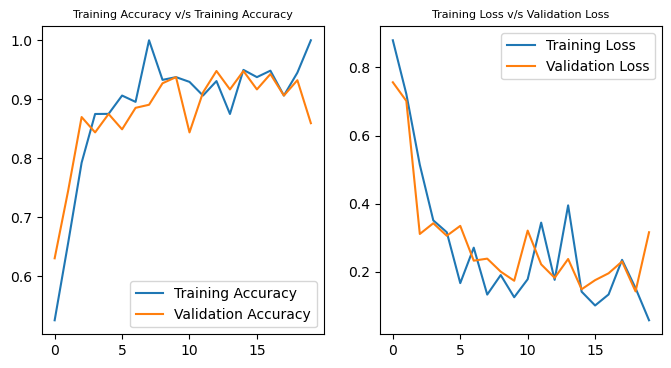

In [24]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training Accuracy v/s Training Accuracy", fontsize = 8)

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss' )
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend()
plt.title("Training Loss v/s Validation Loss", fontsize = 8)
plt.show()

In [25]:
image_batch = 0
len(test_generator)

14

In [26]:
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [27]:
import numpy as np

In [28]:
class_names = np.array(class_names)

In [29]:
type(class_names)

numpy.ndarray

First image print
(256, 256, 3)
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
predicted label: Potato___healthy


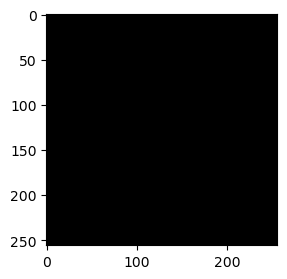

In [42]:
    image_batch, label_batch = next(test_generator)  # Fetch the first batch
    first_img = image_batch[1].astype('uint8')
    first_label = int(label_batch[1])

    print("First image print")
    print(first_img.shape)
    plt.figure(figsize = (3,3))
    plt.imshow(first_img)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[1])])
    

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #create batch dimension
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100*np.max(predictions[0]), 2)
    
    return predicted_class, confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


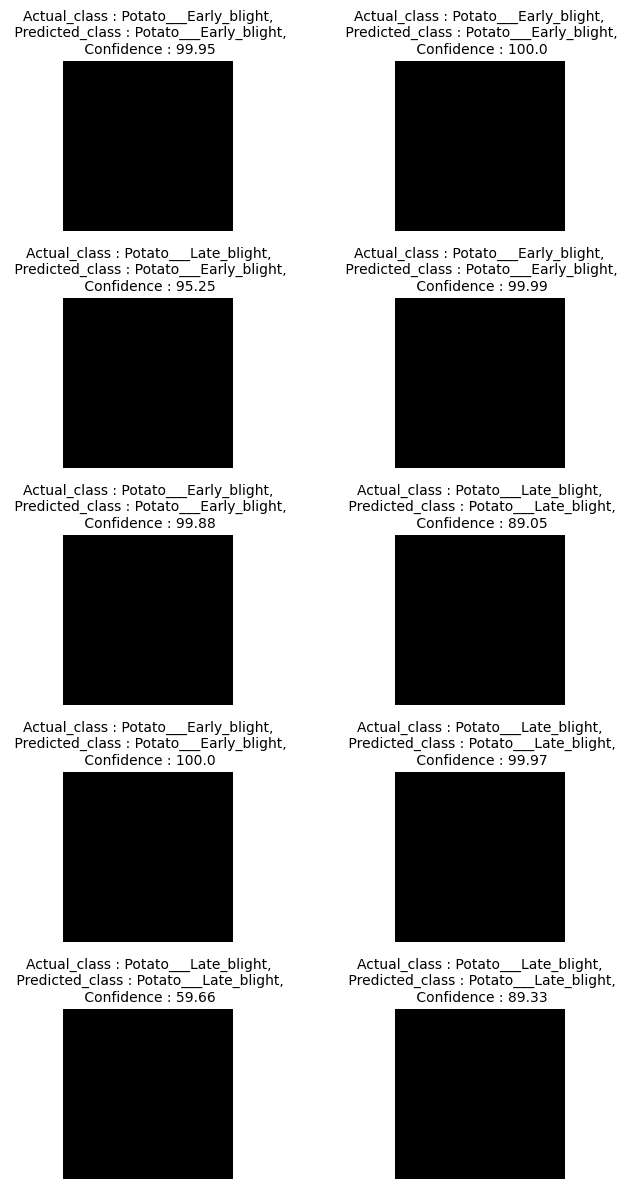

In [50]:

plt.figure(figsize = (8,12))
images, labels = next(test_generator) #test on first batch
for i in range(10):
    ax = plt.subplot(5,2,i+1)
    plt.imshow(images[i].astype('uint8'))
    
    predicted_class, confidence = predict(model,images[i]) 
    actual_class = class_names[int(labels[i])]  # Convert to integer

    plt.title(f"Actual_class : {actual_class},\n Predicted_class : {predicted_class},\n Confidence : {confidence}", fontsize = 10 )
    plt.axis("off")
    # Show the entire figure with subplots
plt.tight_layout()  # Prevent overlap of subplots
plt.show()

In [52]:
import os
import re

def upgrade_version_no():
    filenames = os.listdir("../saved_models")
    version_arr = [0]
    for file in filenames:
        base_name, extension = os.path.splitext(file)
        version_arr.append(int(base_name))
    return (max(version_arr) + 1)


In [54]:
upgrade_version_no()

2

In [56]:

# Save the model in .keras format (recommended)
model.save(f"../saved_models/{upgrade_version_no()}.keras")



In [60]:
import os
print(os.path.abspath("../saved_models/2.keras"))


C:\Users\Kishor\dl_projects\potato_diesese\saved_models\2.keras
